# Car accident severity analysis

In this notebook, an analysis of the severity of the car accidents in the city of Seattle is carried out. In order to asses the risk factors involved in severe car accidents as well as training several machine learning algorithms, the data set provided by the city of Seattle Traffic Management Division and Traffic Rcords Group is used. This data set includes 37 features that describe many aspects of the registered car accidents in Seattle, such as date, location, number of involved,the severity of the accident, number of injuries and fatalities as well as road, light and weather conditions at the time of the accidents.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
data_col = pd.read_csv('Data-Collisions.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#check data out
data_col.head(15)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [5]:
len(data_col)

194673

In [6]:
#parse accident time details

from dateutil import parser
years=[]
months=[]
days=[]
hour=[]

for line in data_col['INCDTTM']:
    string = parser.parse(str(line))
    years.append(string.year)
    months.append(string.month)
    days.append(string.day)
    hour.append(string.hour)

In [7]:
#Remove INCDTTM and append parsed time values to the main data set 
data_col.drop('INCDTTM', axis=1, inplace=True)
data_col['DAY']= days
data_col['MONTH']= months
data_col['YEAR']= years
data_col['HOUR']= hour

In [8]:
data_col.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,DAY,MONTH,YEAR,HOUR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,NaN,10,Entering at angle,0,0,N,27,3,2013,14
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,NaN,11,From same direction - both going straight - bo...,0,0,N,20,12,2006,18
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,NaN,32,One parked--one moving,0,0,N,18,11,2004,10
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,NaN,23,From same direction - all others,0,0,N,29,3,2013,9
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,NaN,10,Entering at angle,0,0,N,28,1,2004,8


In [146]:
df_features = data_col.drop(['SEVERITYCODE'], axis=1)

In [147]:
for col in data_col.columns: 
    print(col) 

SEVERITYCODE
X
Y
OBJECTID
INCKEY
COLDETKEY
REPORTNO
STATUS
ADDRTYPE
INTKEY
LOCATION
EXCEPTRSNCODE
EXCEPTRSNDESC
SEVERITYCODE.1
SEVERITYDESC
COLLISIONTYPE
PERSONCOUNT
PEDCOUNT
PEDCYLCOUNT
VEHCOUNT
INCDATE
JUNCTIONTYPE
SDOT_COLCODE
SDOT_COLDESC
INATTENTIONIND
UNDERINFL
WEATHER
ROADCOND
LIGHTCOND
PEDROWNOTGRNT
SDOTCOLNUM
SPEEDING
ST_COLCODE
ST_COLDESC
SEGLANEKEY
CROSSWALKKEY
HITPARKEDCAR
DAY
MONTH
YEAR
HOUR


In [148]:
# an initial selection of features for the analysis
df = pd.DataFrame(data_col[['SEVERITYCODE', 'DAY', 'MONTH', 'YEAR', 'HOUR','INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING',  'COLLISIONTYPE', 'ADDRTYPE', 'VEHCOUNT', 'PEDCOUNT' ]])




In [149]:
df.head()

,SEVERITYCODE,DAY,MONTH,YEAR,HOUR,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,COLLISIONTYPE,ADDRTYPE,VEHCOUNT,PEDCOUNT
0,2,27,3,2013,14,NaN,0,Overcast,Wet,Daylight,NaN,Angles,Intersection,2,0
1,1,20,12,2006,18,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,Sideswipe,Block,2,0
2,1,18,11,2004,10,NaN,0,Overcast,Dry,Daylight,NaN,Parked Car,Block,3,0
3,1,29,3,2013,9,NaN,0,Clear,Dry,Daylight,NaN,Other,Block,3,0
4,2,28,1,2004,8,NaN,0,Raining,Wet,Daylight,NaN,Angles,Intersection,2,0


In [150]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [151]:
df['SEVERITYCODE'].isna().sum()

0

In [152]:
df['INATTENTIONIND'].isna().sum()

164868

In [153]:
#drop INATTENTIONIND due to too many missing values, also this is hard to measure and could introduce redundancy in the analysis
df.drop('INATTENTIONIND', axis=1, inplace=True)

In [16]:
data_col['UNDERINFL'].head()

0    N
1    0
2    0
3    N
4    0
Name: UNDERINFL, dtype: object

In [17]:
#Group drug and alcohol positive cases in one category as IS positive and the rest as negative.

ind = data_col['UNDERINFL']=='N'
ind
data_col['UNDERINFL'][ind] = '0'

ind = data_col['UNDERINFL']=='Y'
ind
data_col['UNDERINFL'][ind] = '1'

data_col['UNDERINFL'].value_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0    180668
1      9121
Name: UNDERINFL, dtype: int64

In [18]:
#check for missing values
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (194673 - missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    0
Name: SEVERITYCODE, dtype: int64

DAY
False    0
Name: DAY, dtype: int64

MONTH
False    0
Name: MONTH, dtype: int64

YEAR
False    0
Name: YEAR, dtype: int64

HOUR
False    0
Name: HOUR, dtype: int64

UNDERINFL
False      4884
True     189789
Name: UNDERINFL, dtype: int64

WEATHER
False      5081
True     189592
Name: WEATHER, dtype: int64

ROADCOND
False      5012
True     189661
Name: ROADCOND, dtype: int64

LIGHTCOND
False      5170
True     189503
Name: LIGHTCOND, dtype: int64

SPEEDING
True       9333
False    185340
Name: SPEEDING, dtype: int64

COLLISIONTYPE
False      4904
True     189769
Name: COLLISIONTYPE, dtype: int64

ADDRTYPE
False      1926
True     192747
Name: ADDRTYPE, dtype: int64

VEHCOUNT
False    0
Name: VEHCOUNT, dtype: int64

PEDCOUNT
False    0
Name: PEDCOUNT, dtype: int64



In [19]:
#fixing the missing data for features : UNDERINFL, WEATHER, ROADCOND, LIGHTCOND. This will be done by replacing 
#the missing values by the most frequent entry in that column, since the data is categorical and not numeric.
#For UNDERINFL it is N and we replace all missing entries with this entry.
mostcommon = df['UNDERINFL'].value_counts().idxmax()
df['UNDERINFL'].replace(np.nan, mostcommon, inplace=True)

In [20]:
#same procedure for other features
mostcommon = df['WEATHER'].value_counts().idxmax()
df['WEATHER'].replace(np.nan, mostcommon, inplace=True)

mostcommon = df['WEATHER'].value_counts().idxmax()
df['WEATHER'].replace(np.nan, mostcommon, inplace=True)

mostcommon = df['ROADCOND'].value_counts().idxmax()
df['ROADCOND'].replace(np.nan, mostcommon, inplace=True)

mostcommon = df['LIGHTCOND'].value_counts().idxmax()
df['LIGHTCOND'].replace(np.nan, mostcommon, inplace=True)

mostcommon = df['SPEEDING'].value_counts().idxmax()
df['SPEEDING'].replace(np.nan, mostcommon, inplace=True)

mostcommon = df['COLLISIONTYPE'].value_counts().idxmax()
df['COLLISIONTYPE'].replace(np.nan, mostcommon, inplace=True)

mostcommon = df['ADDRTYPE'].value_counts().idxmax()
df['ADDRTYPE'].replace(np.nan, mostcommon, inplace=True)

In [21]:
#no more missing values 
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (194673 - missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    0
Name: SEVERITYCODE, dtype: int64

DAY
False    0
Name: DAY, dtype: int64

MONTH
False    0
Name: MONTH, dtype: int64

YEAR
False    0
Name: YEAR, dtype: int64

HOUR
False    0
Name: HOUR, dtype: int64

UNDERINFL
False    0
Name: UNDERINFL, dtype: int64

WEATHER
False    0
Name: WEATHER, dtype: int64

ROADCOND
False    0
Name: ROADCOND, dtype: int64

LIGHTCOND
False    0
Name: LIGHTCOND, dtype: int64

SPEEDING
False    0
Name: SPEEDING, dtype: int64

COLLISIONTYPE
False    0
Name: COLLISIONTYPE, dtype: int64

ADDRTYPE
False    0
Name: ADDRTYPE, dtype: int64

VEHCOUNT
False    0
Name: VEHCOUNT, dtype: int64

PEDCOUNT
False    0
Name: PEDCOUNT, dtype: int64



In [22]:
df['WEATHER'].value_counts()

Clear                       116216
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [23]:
#create a dictionary for the entries and their categorical number assignments
cleanup_nums1 = {"WEATHER":     {"Clear": 0, "Raining": 1,"Overcast": 2, "Unknown": 3,"Snowing": 4, "Other": 5, "Fog/Smog/Smoke": 6,"Sleet/Hail/Freezing Rain": 7, "Blowing Sand/Dirt": 8,"Severe Crosswind": 9,"Partly Cloudy": 10}}

In [24]:
cleanup_nums1

{'WEATHER': {'Clear': 0,
  'Raining': 1,
  'Overcast': 2,
  'Unknown': 3,
  'Snowing': 4,
  'Other': 5,
  'Fog/Smog/Smoke': 6,
  'Sleet/Hail/Freezing Rain': 7,
  'Blowing Sand/Dirt': 8,
  'Severe Crosswind': 9,
  'Partly Cloudy': 10}}

In [25]:
df.replace(cleanup_nums1, inplace=True)

In [26]:
#now create similar dictionaries for the rest 
df['ROADCOND'].value_counts()

Dry               129522
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [27]:
df['LIGHTCOND'].value_counts()

Daylight                    121307
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [28]:
df['UNDERINFL'].value_counts()

N    105158
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [29]:
df['LIGHTCOND'].value_counts()

Daylight                    121307
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [30]:
df['COLLISIONTYPE'].value_counts()

Parked Car    52891
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [31]:
df['ADDRTYPE'].value_counts()

Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [32]:
cleanup_nums2 = {"ROADCOND":  {"Dry": 0, "Wet": 1, "Unknown": 2, "Ice": 3, "Snow/Slush": 4, "Other": 5, "Standing Water": 6, "Sand/Mud/Dirt": 7, "Oil": 8 }}



In [33]:
cleanup_nums3 = {"SPEEDING":  {"Y": 1 }}



In [34]:
cleanup_nums4 = {"UNDERINFL":  {"0": 0, "1": 1, "N": 2, "Y": 3 }}


In [35]:
cleanup_nums5 = {"LIGHTCOND":  {"Daylight": 0, "Dark - Street Lights On": 1, "Unknown": 2, "Dusk": 3, "Dawn": 4, "Dark - No Street Lights": 5, "Dark - Street Lights Off": 6, "Other": 7, "Dark - Unknown Lighting": 8 }}


In [36]:
cleanup_nums6 = {"COLLISIONTYPE":  {"Parked Car": 0, "Angles": 1, "Rear Ended": 2, "Sideswipe": 3, "Left Turn": 4, "Other": 5, "Pedestrian": 6, "Cycles": 7, "Right Turn": 8,  "Head On": 9}}


In [37]:
cleanup_nums7 = {"ADDRTYPE":  {"Block": 0, "Intersection": 1, "Alley": 2}}

In [38]:
df.replace(cleanup_nums2, inplace=True)
df.replace(cleanup_nums3, inplace=True)
df.replace(cleanup_nums4, inplace=True)
df.replace(cleanup_nums5, inplace=True)
df.replace(cleanup_nums6, inplace=True)
df.replace(cleanup_nums7, inplace=True)

In [39]:
df.head()

,SEVERITYCODE,DAY,MONTH,YEAR,HOUR,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,COLLISIONTYPE,ADDRTYPE,VEHCOUNT,PEDCOUNT
0,2,27,3,2013,14,2,2,1,0,1,1,1,2,0
1,1,20,12,2006,18,0,1,1,1,1,3,0,2,0
2,1,18,11,2004,10,0,2,0,0,1,0,0,3,0
3,1,29,3,2013,9,2,0,0,0,1,5,0,3,0
4,2,28,1,2004,8,0,1,1,0,1,1,1,2,0


In [40]:
df['HOUR'].value_counts()

0     34381
17    12947
16    12122
15    11514
14    10615
12    10384
13    10219
18     9743
8      8570
11     8209
9      8052
10     7465
19     7256
7      6543
20     6236
21     5571
22     5468
23     4611
2      3606
1      3408
6      3199
5      1667
3      1665
4      1222
Name: HOUR, dtype: int64

In [41]:
df['SPEEDING'].value_counts()

1    194673
Name: SPEEDING, dtype: int64

In [42]:
# Since the feature SPEEDING has only a single entry (all cases were speeding at the time of the accident?), we drop this feature.
df.drop('SPEEDING', axis=1, inplace=True)

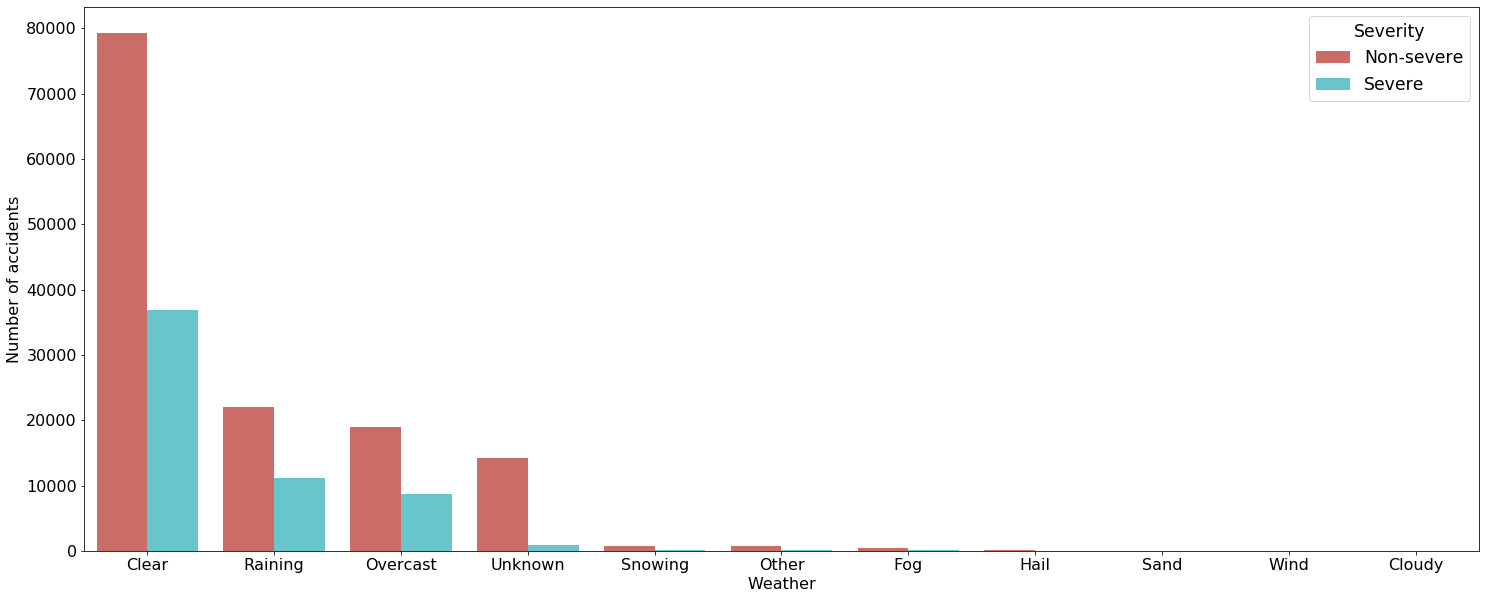

In [43]:
#explore the data
sns.set_palette("hls", 2)
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="WEATHER", hue="SEVERITYCODE", data=df)
ax.set_xticklabels(['Clear','Raining','Overcast', "Unknown", 'Snowing', 'Other', 'Fog', 'Hail','Sand','Wind', 'Cloudy'])
#ax.legend(fontsize=20, title="Severity")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Weather', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

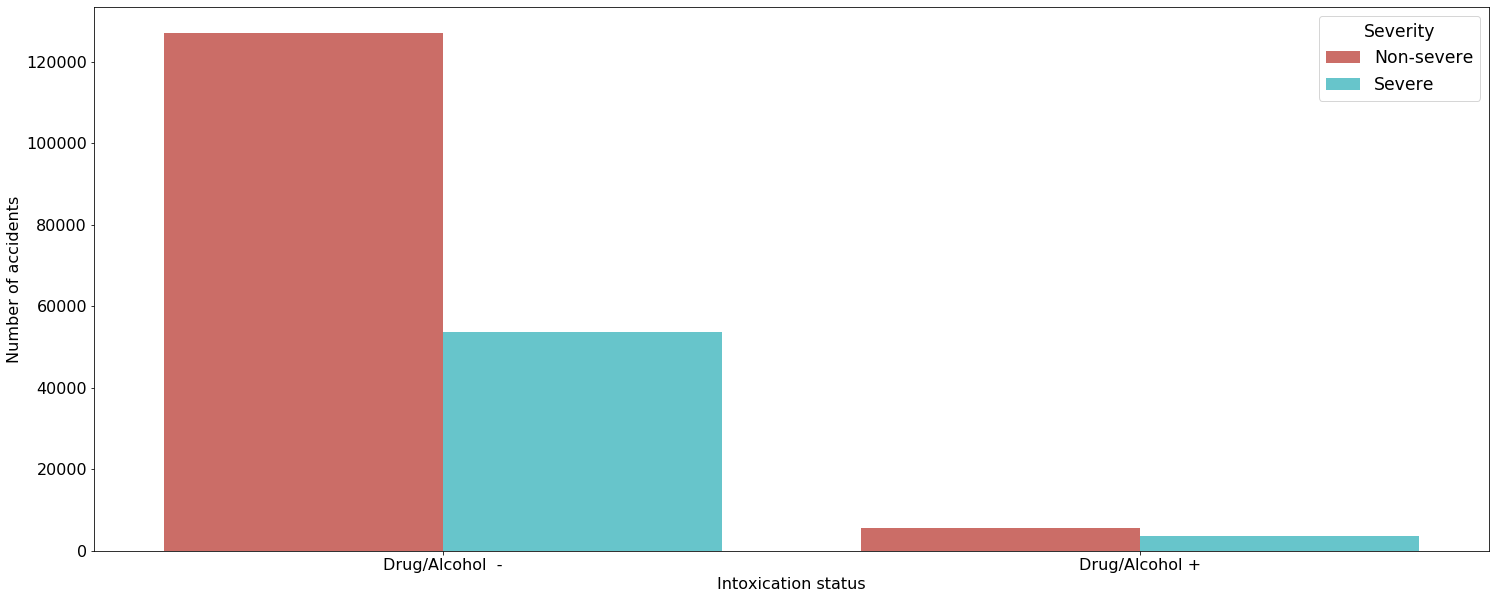

In [44]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="UNDERINFL", hue="SEVERITYCODE", data=data_col)
ax.set_xticklabels(['Drug/Alcohol  -','Drug/Alcohol +'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Intoxication status', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

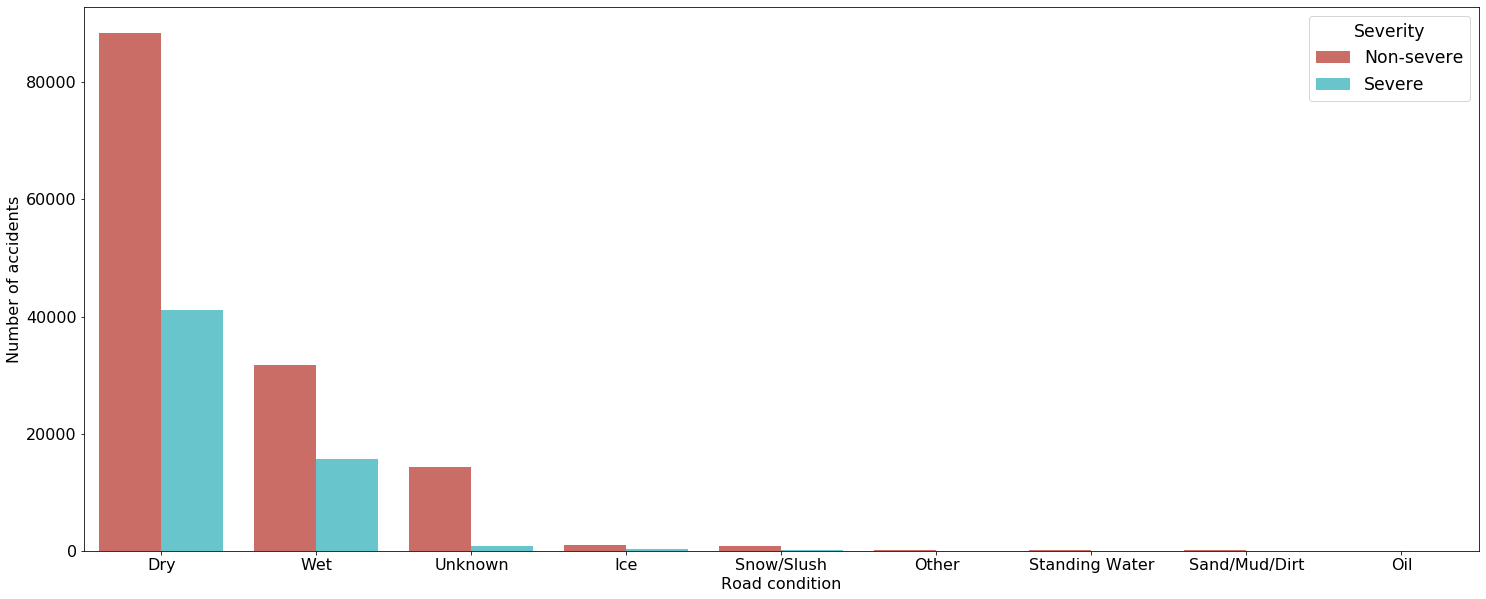

In [45]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="ROADCOND", hue="SEVERITYCODE", data=df)
ax.set_xticklabels(['Dry','Wet','Unknown', "Ice", 'Snow/Slush', 'Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Road condition', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

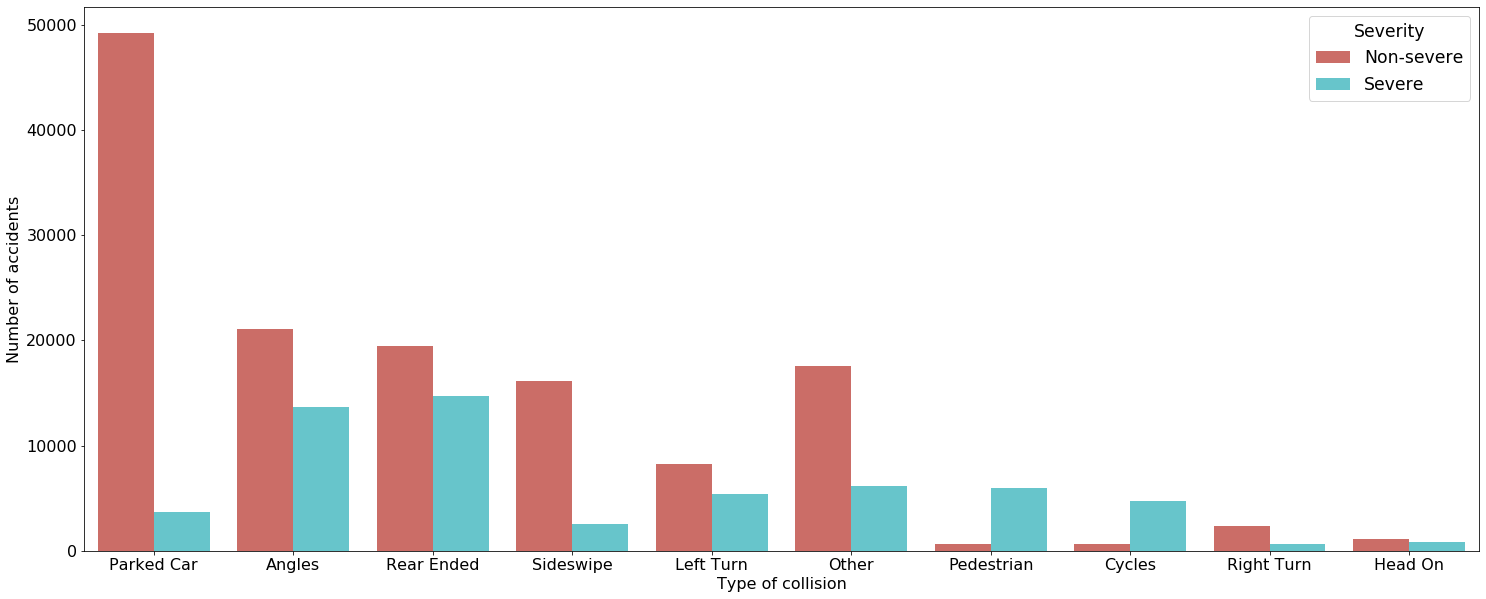

In [46]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="COLLISIONTYPE", hue="SEVERITYCODE", data=df)
ax.set_xticklabels(["Parked Car", "Angles", "Rear Ended", "Sideswipe", "Left Turn", "Other", "Pedestrian", "Cycles", "Right Turn",  "Head On"])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Type of collision', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

Most deadly accidents occur when a vehicle and a pedestrian or a cycle is involved in an accident. Many accidents that occur at an angle, rear ended, while turning left and especiallyhead on are deadlier than other types of accidents.

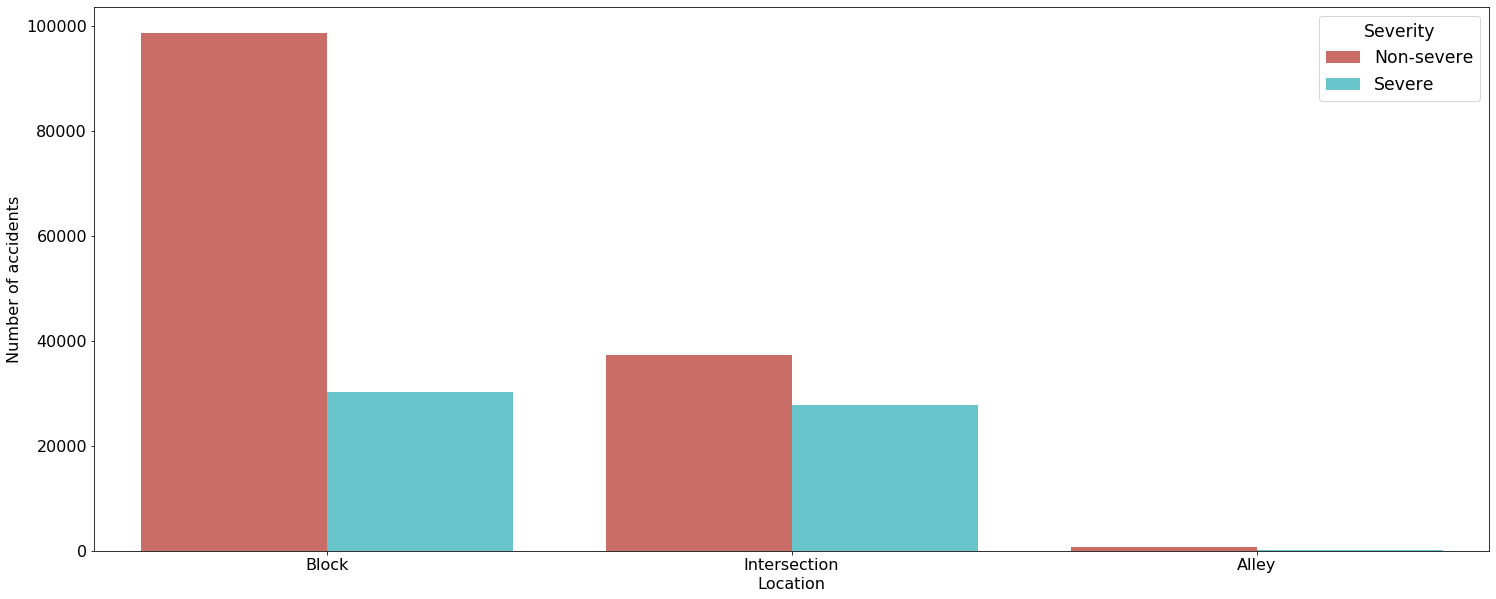

In [47]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="ADDRTYPE", hue="SEVERITYCODE", data=df)
ax.set_xticklabels(["Block", "Intersection", "Alley"])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Location', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

Accidents are most severe when they occur at intersections.

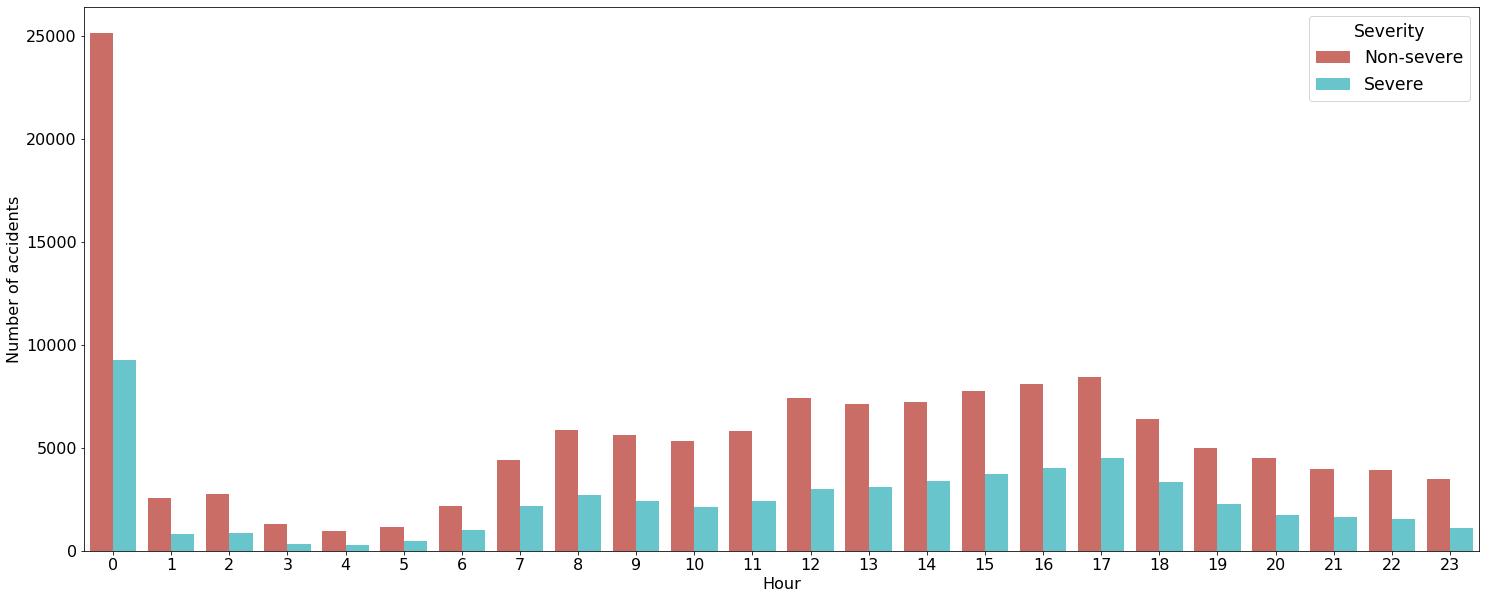

In [48]:
#histograms of date and time
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="HOUR", hue="SEVERITYCODE", data=df)
#ax.set_xticklabels(["Block", "Intersection", "Alley"])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )
plt.savefig('datetime.png')


In [49]:
severe = df[df.SEVERITYCODE == 2].groupby('HOUR').count()
non_severe = df[df.SEVERITYCODE == 1].groupby('HOUR').count()
severe = severe.reset_index()
non_severe = non_severe.reset_index()

In [50]:
rate = severe['SEVERITYCODE']/(severe['SEVERITYCODE'] + non_severe['SEVERITYCODE'])
rate.max(), rate.min()

(0.3474163898972735, 0.20960960960960962)

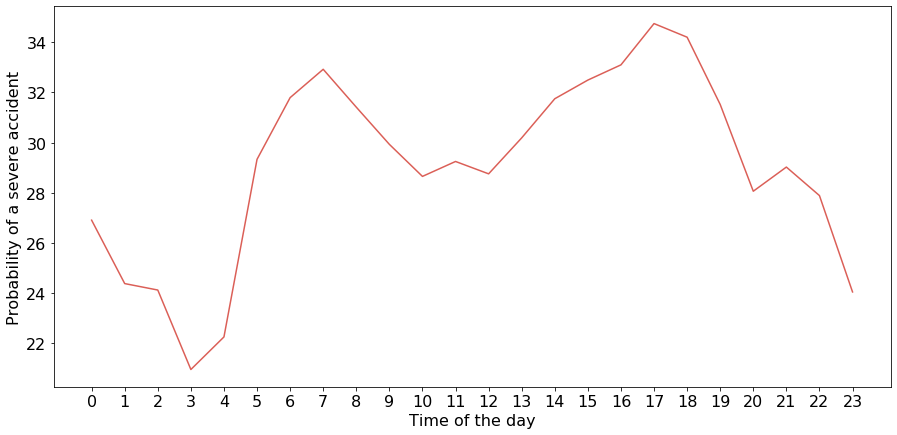

In [51]:
fig = plt.figure(figsize=(15,7))
plt.plot(severe['HOUR'], rate*100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(severe['HOUR'])
plt.xlabel('Time of the day', fontsize=16)
plt.ylabel('Probability of a severe accident', fontsize=16)
plt.savefig('timeseries.png')


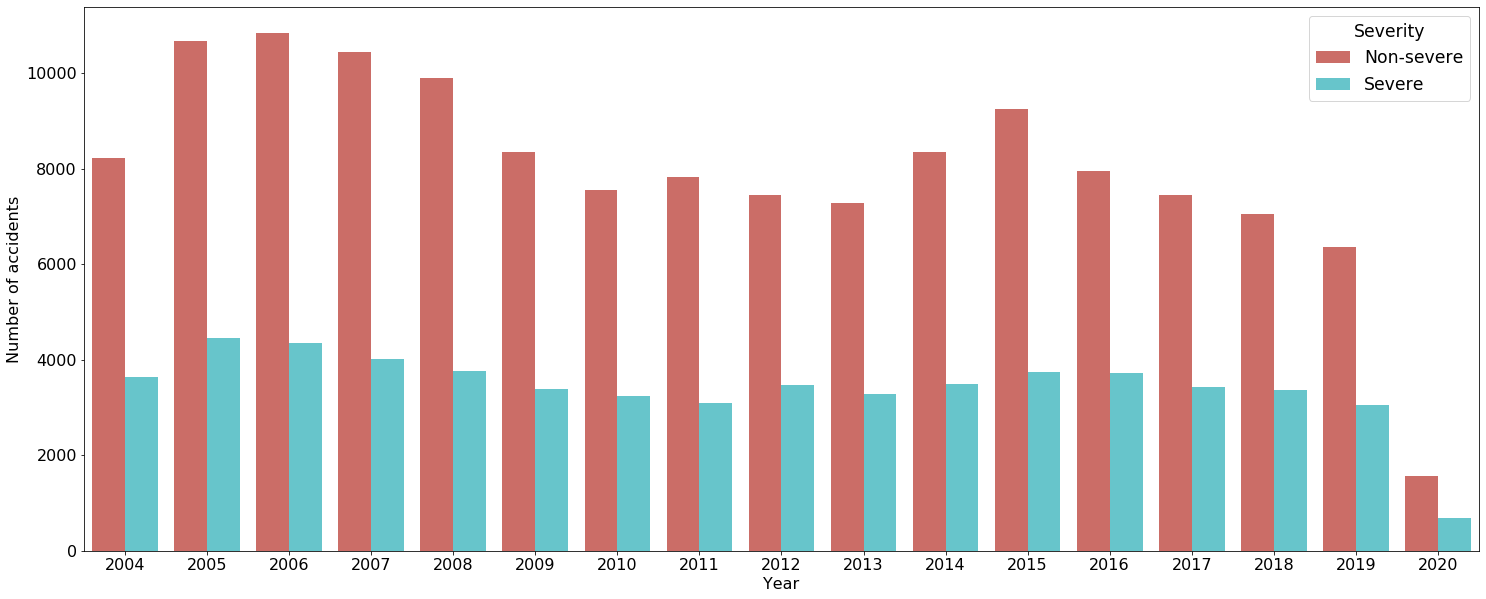

In [52]:
#histograms of date and time
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="YEAR", hue="SEVERITYCODE", data=df)
#ax.set_xticklabels(["Block", "Intersection", "Alley"])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )
plt.savefig('year.png')


It turns out, the probability of having a severe accident peaks right around 17.00 (5 pm) and is a minimum at 03.00 (3 am). This makes sense since people leave their jobs and schools at around 17.00 and the roads can get very crowded very quickly. The second most prominent peak is at around 7 am which is when people are possibly on the road to their jobs and schools.

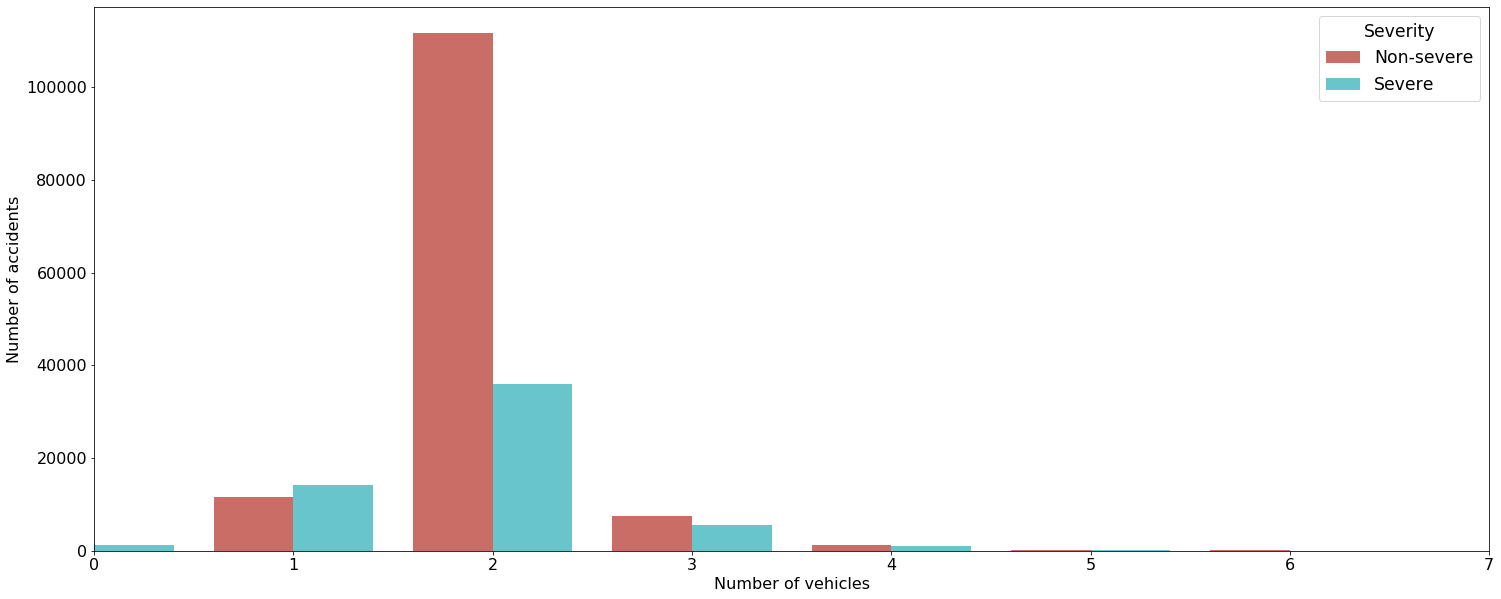

In [53]:
#histograms of the vehicle count.
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="VEHCOUNT", hue="SEVERITYCODE", data=df)
#ax.set_xticklabels(["Block", "Intersection", "Alley"])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Number of vehicles', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.xlim(0,7)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )
plt.savefig('vehcount.png')

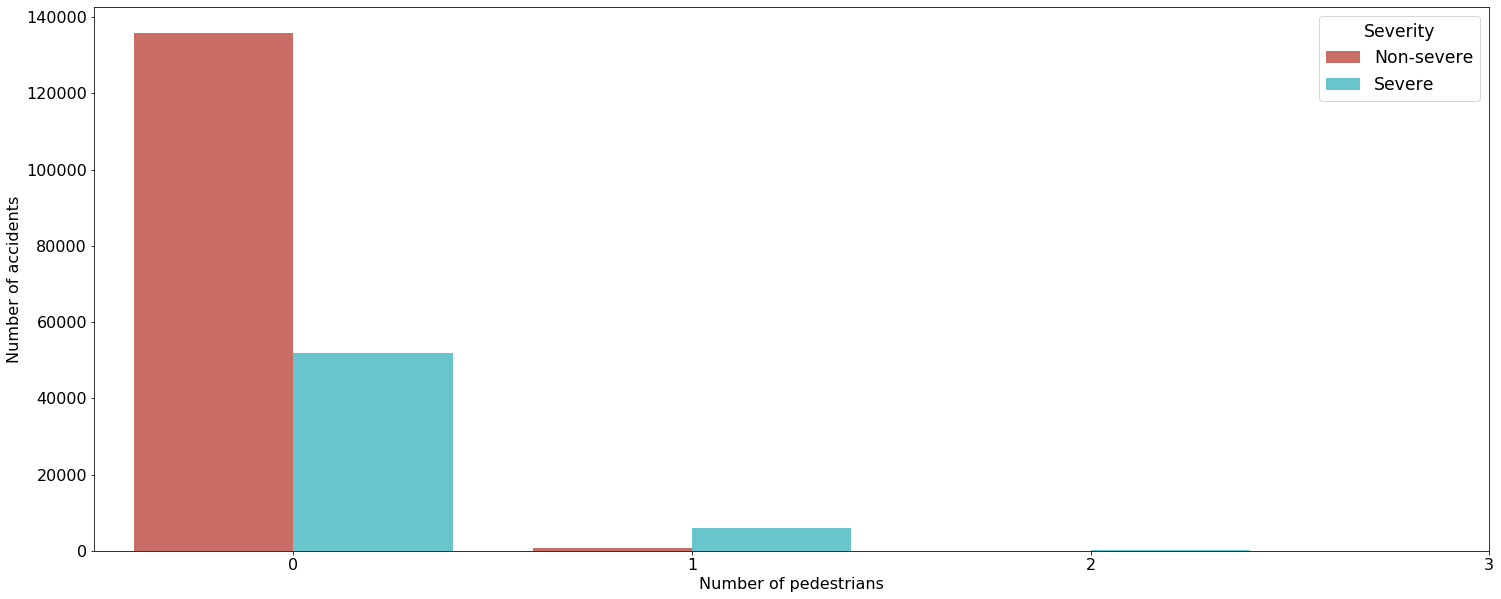

In [54]:
#Histogram of the pedestrian count.
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="PEDCOUNT", hue="SEVERITYCODE", data=df)
#ax.set_xticklabels(["Block", "Intersection", "Alley"])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Number of pedestrians', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.xlim(-0.5,3)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )
plt.savefig('pedcount.png')


The accidents with two vehicles involved seems to be most prevalent but least deadly compared to the accidents with a single vehicle or 3 or 4 vehicles involved.

In [55]:
for col in df.columns: 
    print(col) 

SEVERITYCODE
DAY
MONTH
YEAR
HOUR
UNDERINFL
WEATHER
ROADCOND
LIGHTCOND
COLLISIONTYPE
ADDRTYPE
VEHCOUNT
PEDCOUNT


In [154]:
features= [ 'MONTH', 'HOUR', 'YEAR', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE', 'ADDRTYPE', 'VEHCOUNT', 'PEDCOUNT']
labels = ['SEVERITYCODE']

Car accidents with a pedestrian involved are very likely to be severe (resulting in injury) compared to the accidents without pedestrian involvement.

In [57]:
# PCA
from sklearn.preprocessing import StandardScaler
#features = [ 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['SEVERITYCODE']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['SEVERITYCODE']]], axis = 1)


In [59]:
#Let's check the PCA components.
pca.components_

array([[ 0.02174009, -0.18310328, -0.50570554, -0.49907342,  0.35228047,
         0.34108823,  0.21044786, -0.22935133, -0.18933534,  0.22601591,
        -0.1921564 ],
       [ 0.0099094 ,  0.2289573 ,  0.43347505,  0.45373531,  0.4274854 ,
         0.43281436,  0.29401892, -0.21839167, -0.14600095,  0.11614177,
        -0.12118058]])

The features YEAR, UNDERINFL, WEATHER, ROADCOND are explaining the most of the variability in the data according to this PCA analysis. The amount of variablity that is explained by the day of the month is very small, so we drop that feature as well.

In [60]:
df.drop('DAY', axis=1, inplace=True)

In [61]:
df.head()

,SEVERITYCODE,MONTH,YEAR,HOUR,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE,ADDRTYPE,VEHCOUNT,PEDCOUNT
0,2,3,2013,14,2,2,1,0,1,1,2,0
1,1,12,2006,18,0,1,1,1,3,0,2,0
2,1,11,2004,10,0,2,0,0,0,0,3,0
3,1,3,2013,9,2,0,0,0,5,0,3,0
4,2,1,2004,8,0,1,1,0,1,1,2,0


In [62]:
#Build the correlation matrix.
corrMatrix =df.corr()

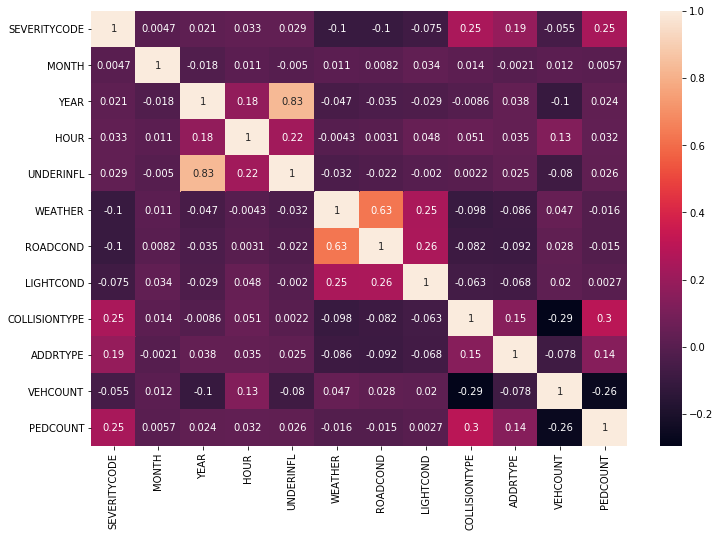

In [63]:
#Here we can see how different features are correlated with one another.
plt.subplots(figsize=(12,8))
#labels=['SEVERITYCODE', 'MONTH', 'YEAR', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE', 'ADDRTYPE', 'VEHCOUNT', 'PEDCOUNT']

sns.heatmap(corrMatrix, annot=True)
plt.savefig('corr.png')
plt.show()


The severity of the accidents are majorly correlated to collision type, location and whether or not pedestrians were involved in the accidents. Weather and related road conditions are also highly contributing to the severity of the accidents. Furthermore, there is a correlation betwen the type of the collision and how many pedestrians were involved in it.

We can also observe that the weather and road conditions are highly correlated. In fact, these two features have the highest correlation throughout the data set.

Another interesting correlation is between intoxication and the time of the day.

In [64]:
df.head()

,SEVERITYCODE,MONTH,YEAR,HOUR,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE,ADDRTYPE,VEHCOUNT,PEDCOUNT
0,2,3,2013,14,2,2,1,0,1,1,2,0
1,1,12,2006,18,0,1,1,1,3,0,2,0
2,1,11,2004,10,0,2,0,0,0,0,3,0
3,1,3,2013,9,2,0,0,0,5,0,3,0
4,2,1,2004,8,0,1,1,0,1,1,2,0


In [144]:
# Now it is time to separate the labels and features,
y = df['SEVERITYCODE']
features=df.drop('SEVERITYCODE', axis=1, inplace=True)

In [66]:
# And to scale the data.
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(X)

Now it is time for some clustering analysis to explore the data deeper. For this, we first use the K-means clustering method.

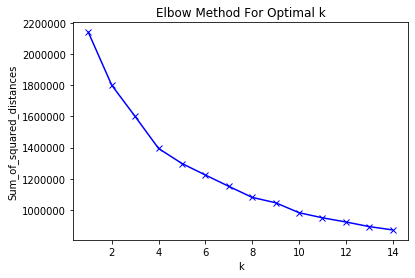

In [67]:
#find out the optimal number of clusters, k

from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
#the elbow graph
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
# k=4 ?

In [68]:
#Looks like k=4 is optimal. Now initializing k-means.
from sklearn.cluster import KMeans
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(df_scaled)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
y_kmeans = k_means.predict(df_scaled)

cluster_labels = k_means.labels_

#grab the original data set 
#add the cluster labels
df_cl = df
df_cl['SEVERITYCODE'] = y
df_cl['labels']= cluster_labels
df_cl.head()

#split the data set wrt labels and explore the trends in each cluster
df_cl0 = df_cl[df_cl['labels']==0]
df_cl1 = df_cl[df_cl['labels']==1]
df_cl2 = df_cl[df_cl['labels']==2]
df_cl3 = df_cl[df_cl['labels']==3]

In [69]:
df_cl0.head()

,MONTH,YEAR,HOUR,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE,ADDRTYPE,VEHCOUNT,PEDCOUNT,SEVERITYCODE,labels
0,3,2013,14,2,2,1,0,1,1,2,0,2,0
3,3,2013,9,2,0,0,0,5,0,3,0,1,0
5,4,2019,17,2,0,0,0,1,1,2,0,1,0
7,4,2020,17,2,0,0,0,7,1,1,0,2,0
14,3,2013,2,2,0,0,1,9,0,2,0,2,0


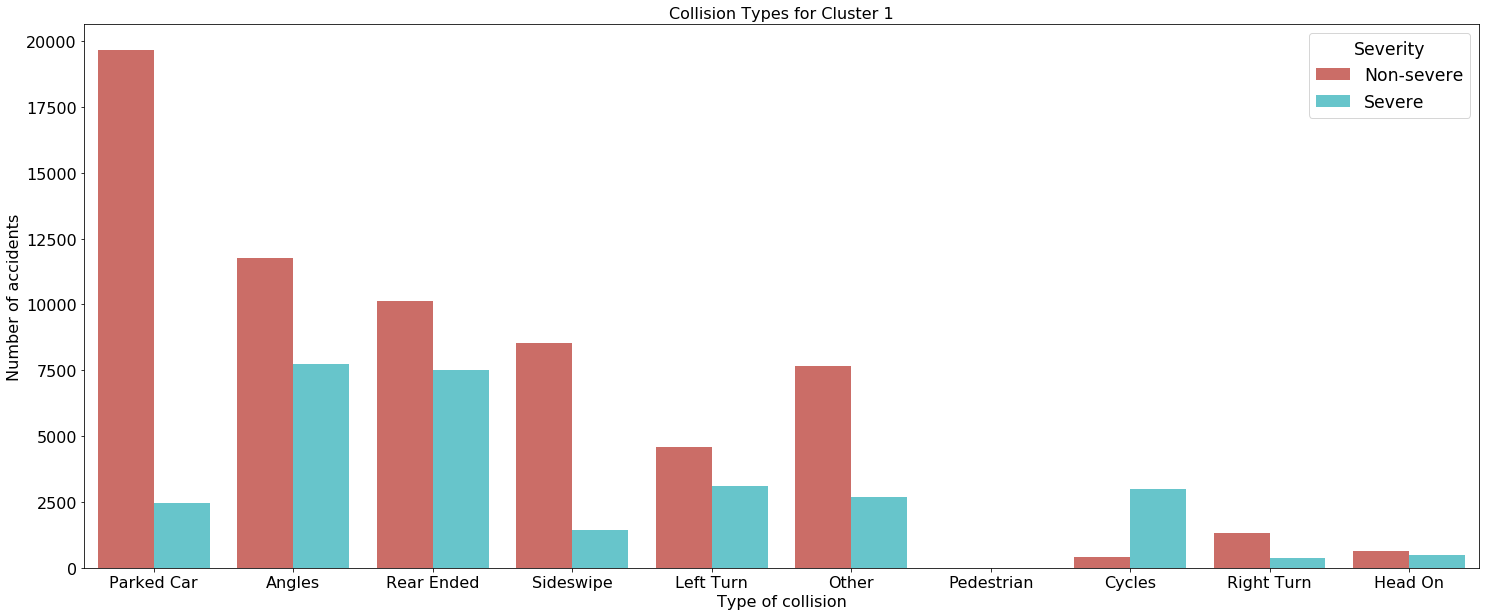

In [70]:
#collision type, location and whether or not pedestrians
#Cluster 1, collision
sns.set_palette("hls", 2)
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="COLLISIONTYPE", hue="SEVERITYCODE", data=df_cl0)
ax.set_xticklabels(['Parked Car', 'Angles', 'Rear Ended', 'Sideswipe', 'Left Turn', 'Other', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On'])
#ax.legend(fontsize=20, title="Severity")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Type of collision', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.title('Collision Types for Cluster 1', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

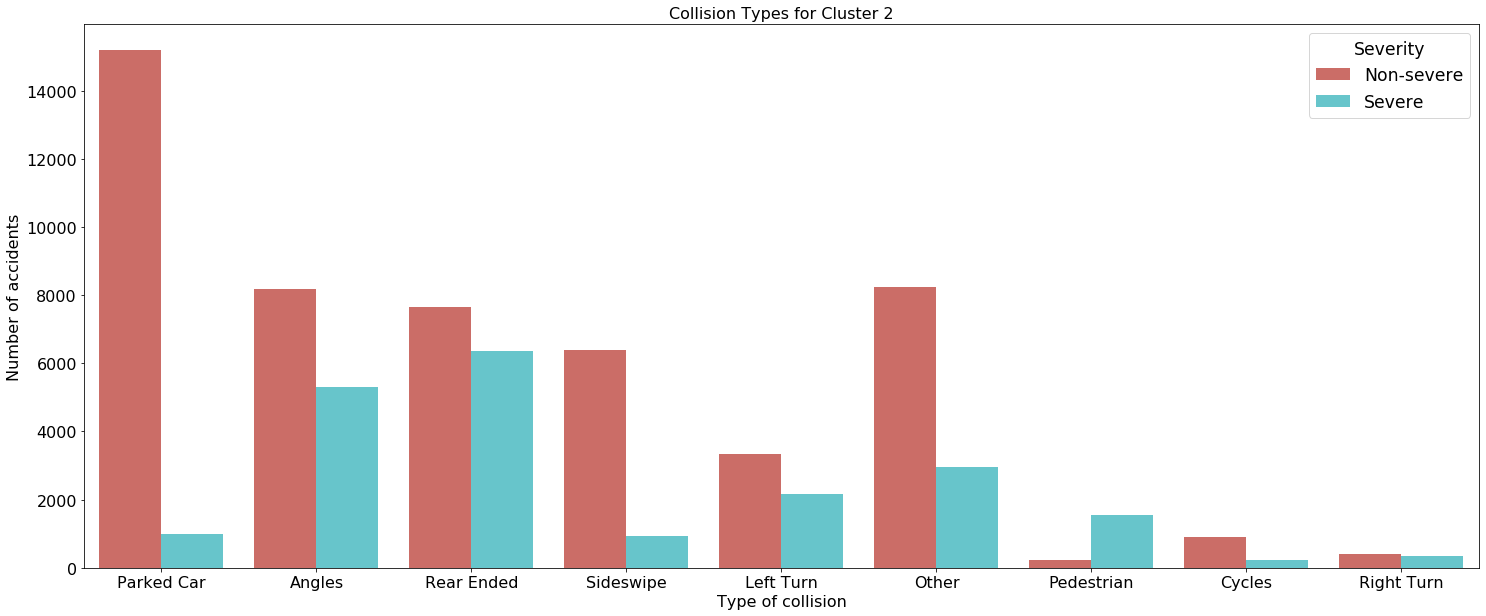

In [71]:
#collision type, location and whether or not pedestrians
#Cluster 2, collision
sns.set_palette("hls", 2)
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="COLLISIONTYPE", hue="SEVERITYCODE", data=df_cl1)
ax.set_xticklabels(['Parked Car', 'Angles', 'Rear Ended', 'Sideswipe', 'Left Turn', 'Other', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On'])
#ax.legend(fontsize=20, title="Severity")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Type of collision', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.title('Collision Types for Cluster 2', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

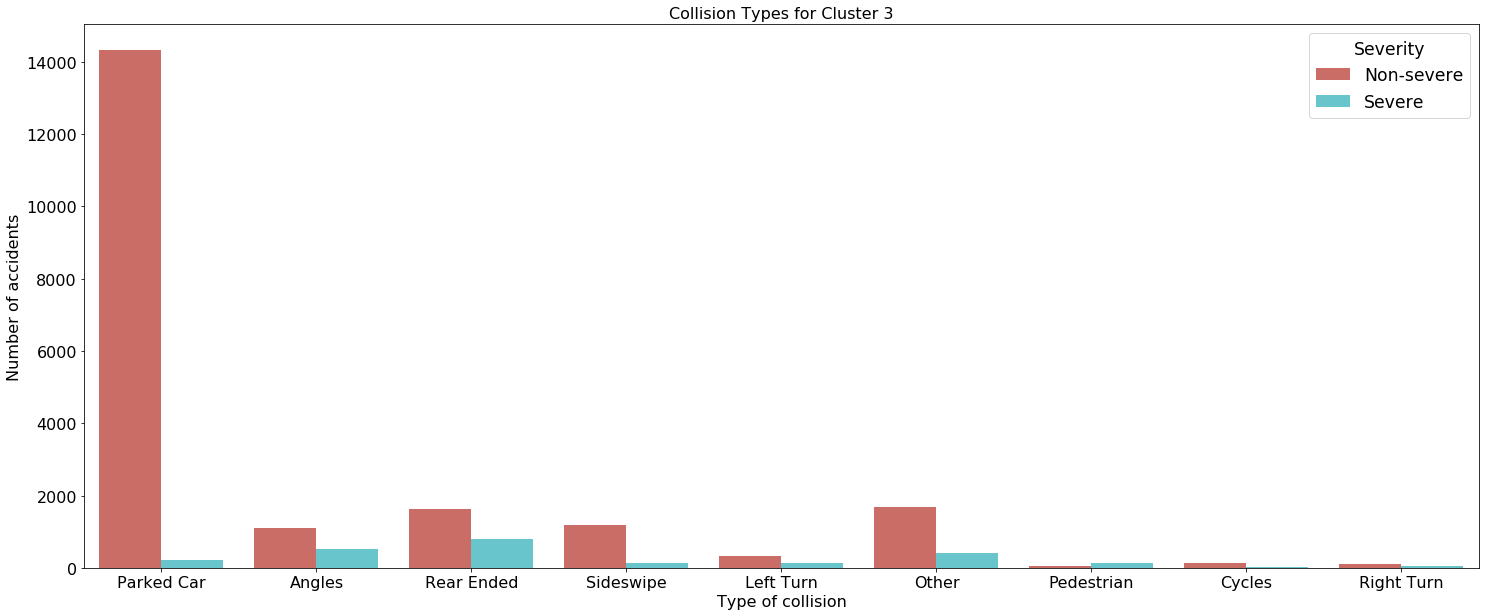

In [72]:
#collision type, location and whether or not pedestrians
#Cluster 3, collision
sns.set_palette("hls", 2)
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="COLLISIONTYPE", hue="SEVERITYCODE", data=df_cl2)
ax.set_xticklabels(['Parked Car', 'Angles', 'Rear Ended', 'Sideswipe', 'Left Turn', 'Other', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On'])
#ax.legend(fontsize=20, title="Severity")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Type of collision', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.title('Collision Types for Cluster 3', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

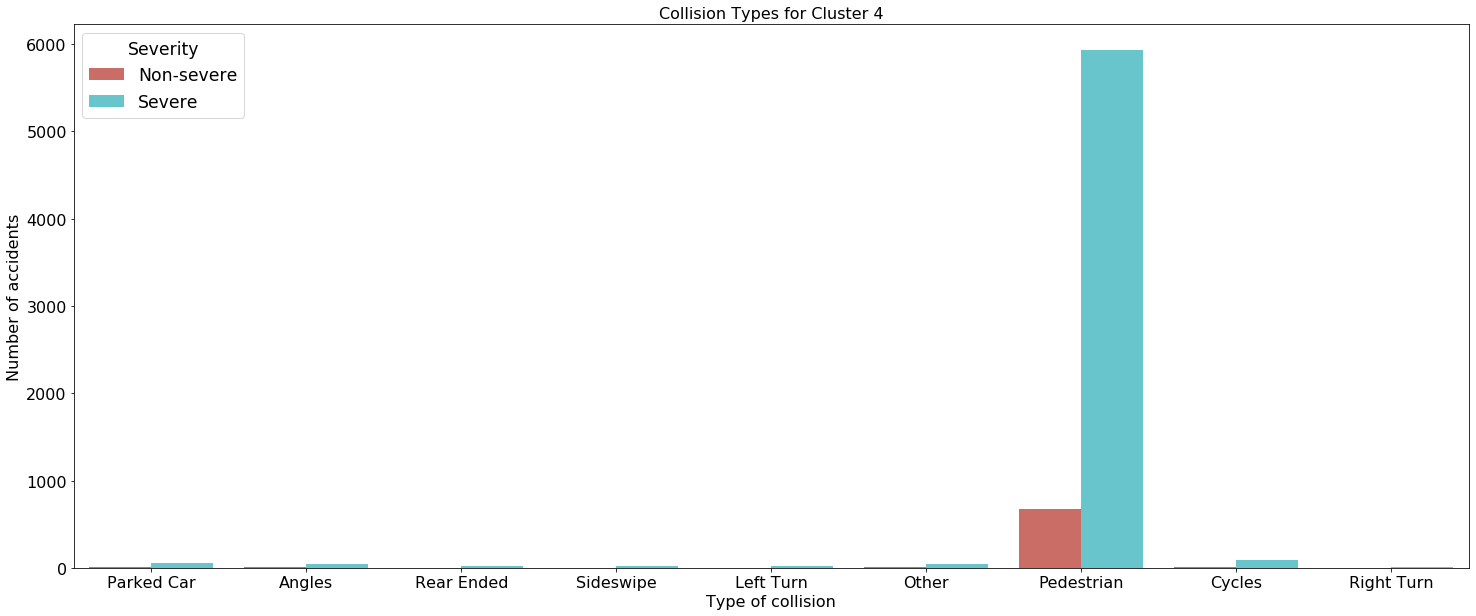

In [73]:
#collision type, location and whether or not pedestrians
#Cluster 4, collision
sns.set_palette("hls", 2)
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="COLLISIONTYPE", hue="SEVERITYCODE", data=df_cl3)
ax.set_xticklabels(['Parked Car', 'Angles', 'Rear Ended', 'Sideswipe', 'Left Turn', 'Other', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On'])
#ax.legend(fontsize=20, title="Severity")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Type of collision', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.title('Collision Types for Cluster 4', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

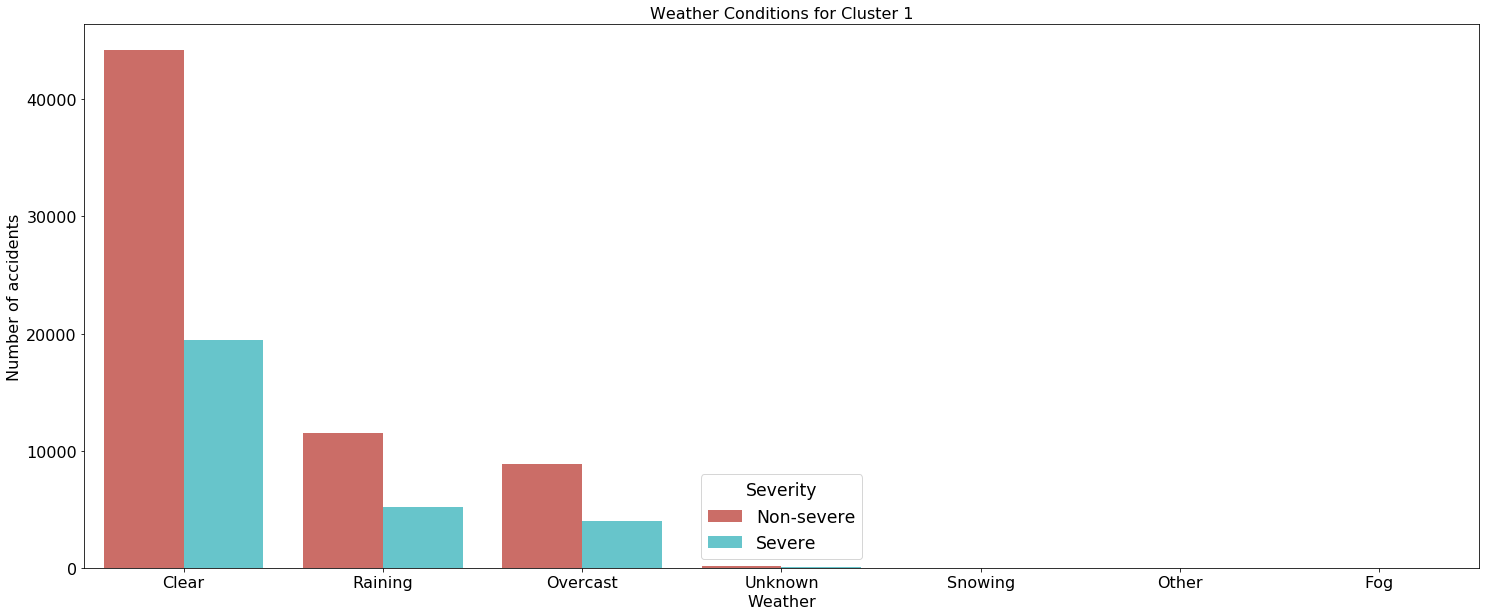

In [74]:
#Cluster 1, weather
sns.set_palette("hls", 2)
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="WEATHER", hue="SEVERITYCODE", data=df_cl0)
ax.set_xticklabels(['Clear','Raining','Overcast', "Unknown", 'Snowing', 'Other', 'Fog', 'Hail','Sand','Wind', 'Cloudy'])
#ax.legend(fontsize=20, title="Severity")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Weather', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.title('Weather Conditions for Cluster 1', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

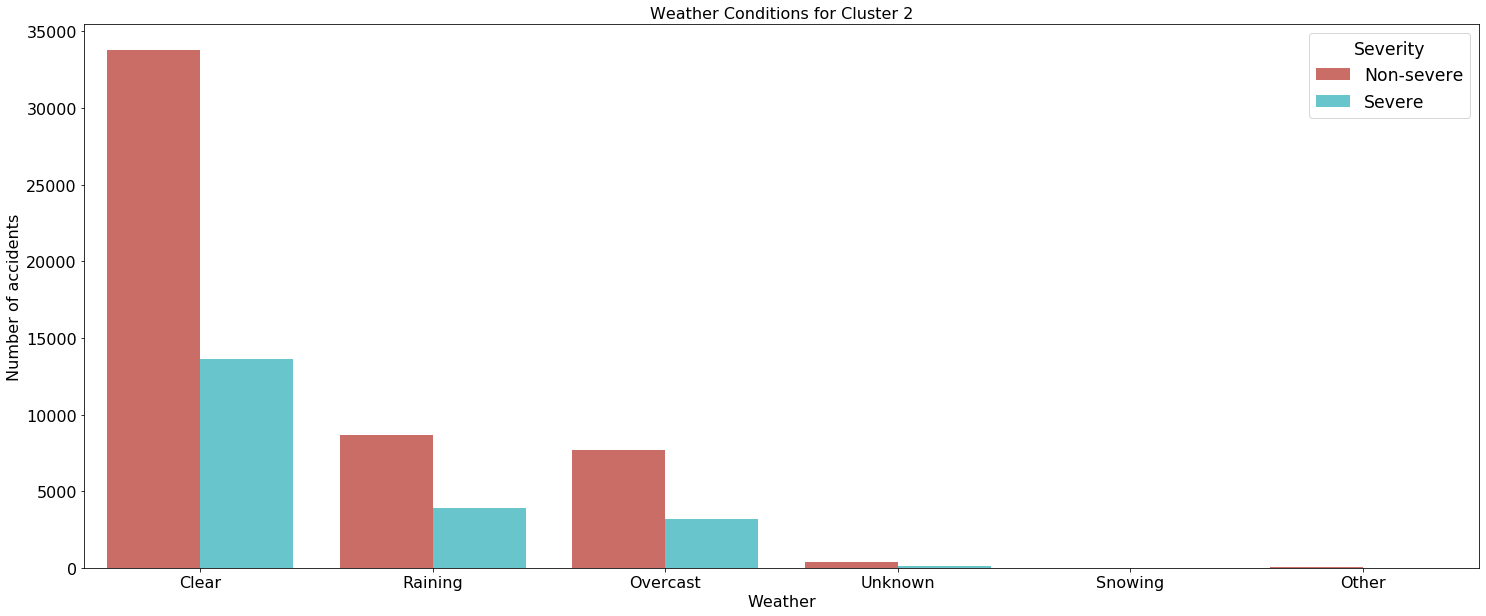

In [75]:
#Cluster 2, weather
sns.set_palette("hls", 2)
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="WEATHER", hue="SEVERITYCODE", data=df_cl1)
ax.set_xticklabels(['Clear','Raining','Overcast', "Unknown", 'Snowing', 'Other', 'Fog', 'Hail','Sand','Wind', 'Cloudy'])
#ax.legend(fontsize=20, title="Severity")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Weather', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.title('Weather Conditions for Cluster 2', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

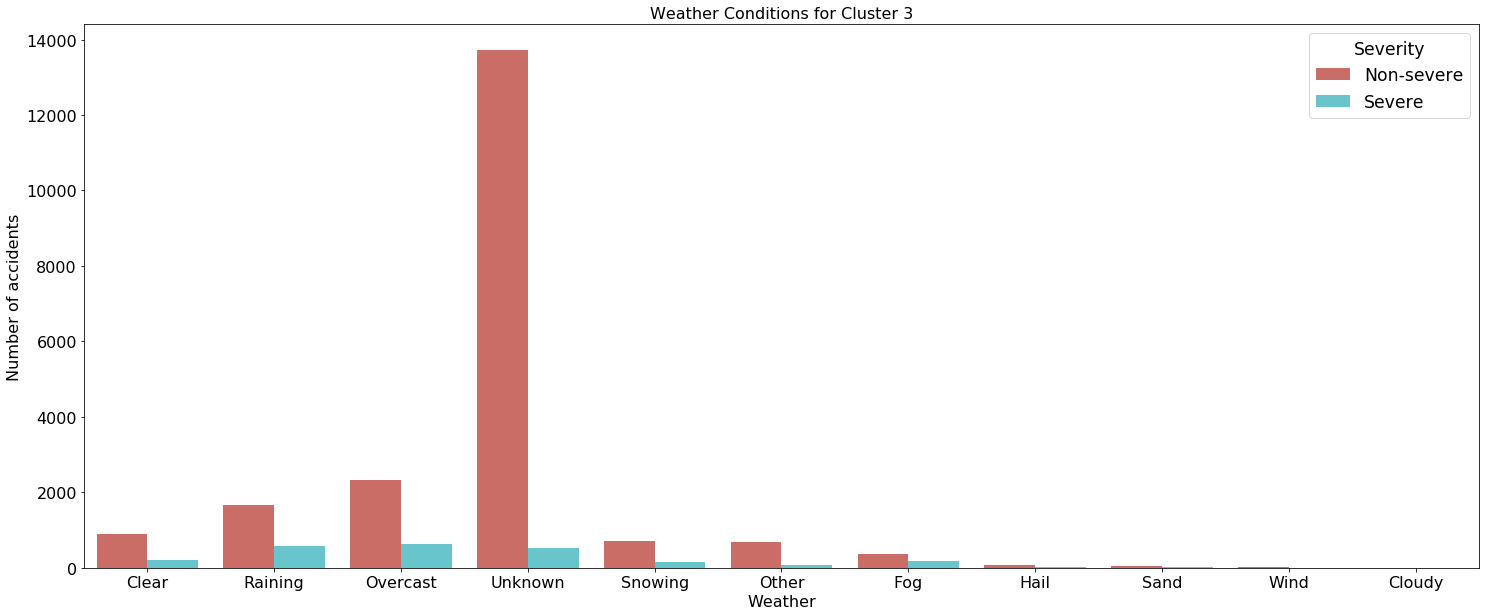

In [76]:
#Cluster 3, weather
sns.set_palette("hls", 2)
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="WEATHER", hue="SEVERITYCODE", data=df_cl2)
ax.set_xticklabels(['Clear','Raining','Overcast', "Unknown", 'Snowing', 'Other', 'Fog', 'Hail','Sand','Wind', 'Cloudy'])
#ax.legend(fontsize=20, title="Severity")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Weather', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.title('Weather Conditions for Cluster 3', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

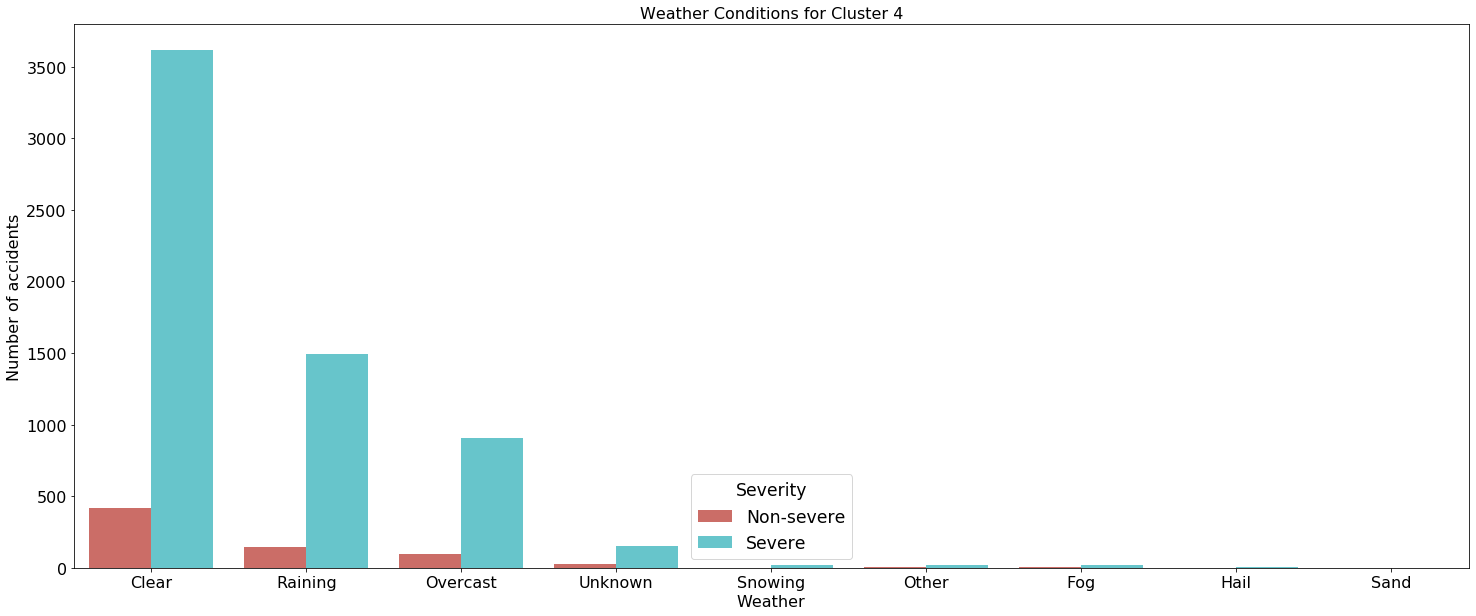

In [77]:
#Cluster 4, weather
sns.set_palette("hls", 2)
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="WEATHER", hue="SEVERITYCODE", data=df_cl3)
ax.set_xticklabels(['Clear','Raining','Overcast', "Unknown", 'Snowing', 'Other', 'Fog', 'Hail','Sand','Wind', 'Cloudy'])
#ax.legend(fontsize=20, title="Severity")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Weather', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.title('Weather Conditions for Cluster 4', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

Cluster 1 seems to be the severe accident dominated cluster. This cluster is of the most interest since these types of accidents cause human injuries.

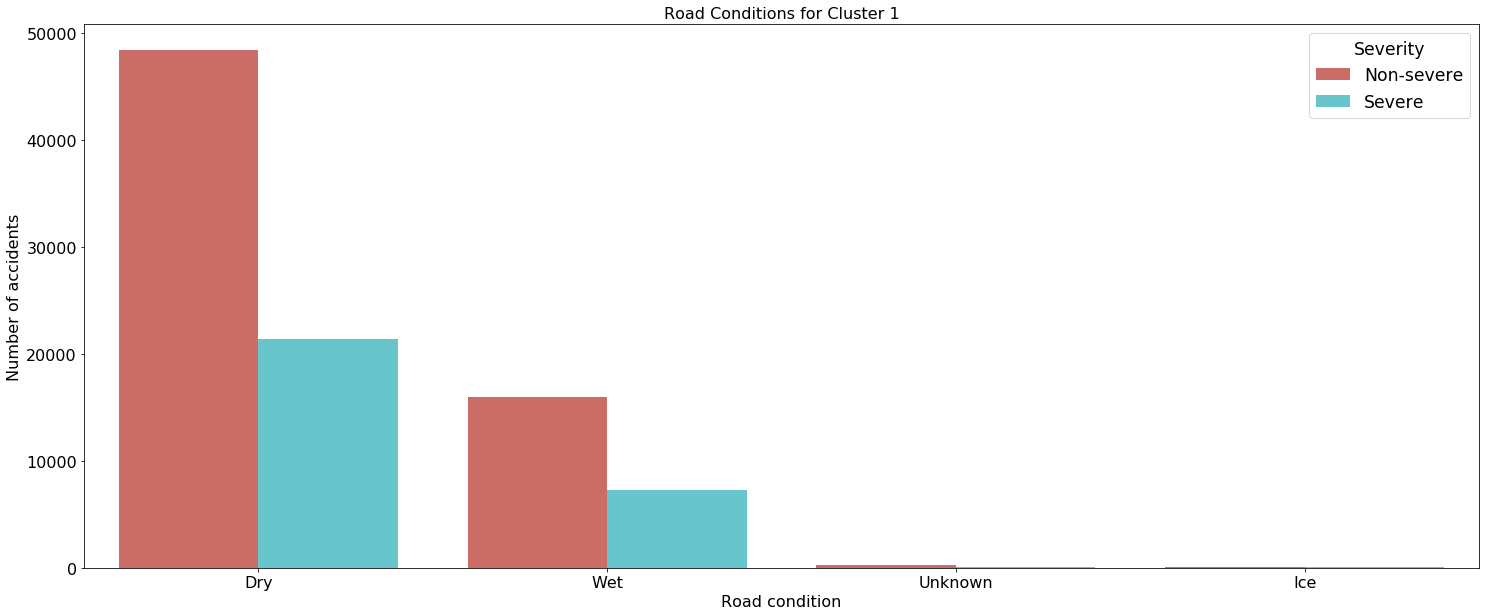

In [78]:
#Now check the clusters out for ROADCOND, cluster 1 first
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="ROADCOND", hue="SEVERITYCODE", data=df_cl0)
ax.set_xticklabels(['Dry','Wet','Unknown', "Ice", 'Snow/Slush', 'Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Road condition', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.title('Road Conditions for Cluster 1', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

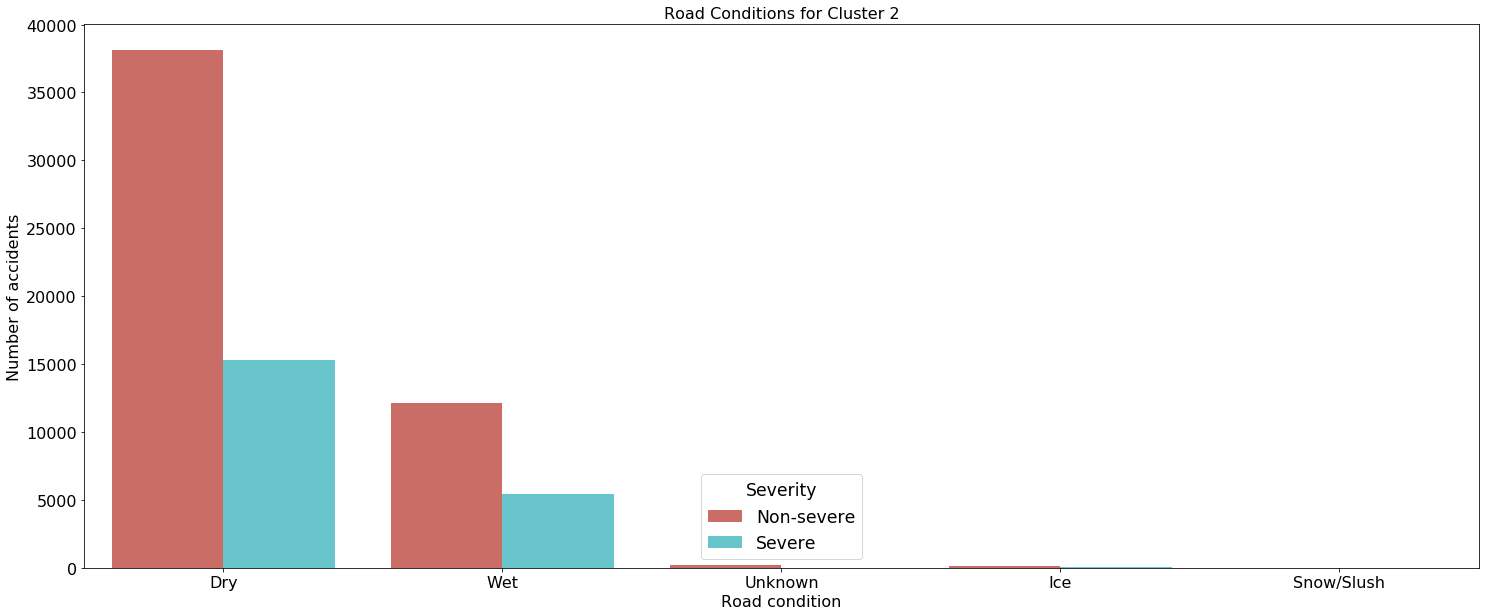

In [79]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="ROADCOND", hue="SEVERITYCODE", data=df_cl1)
ax.set_xticklabels(['Dry','Wet','Unknown', "Ice", 'Snow/Slush', 'Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Road condition', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.title('Road Conditions for Cluster 2', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

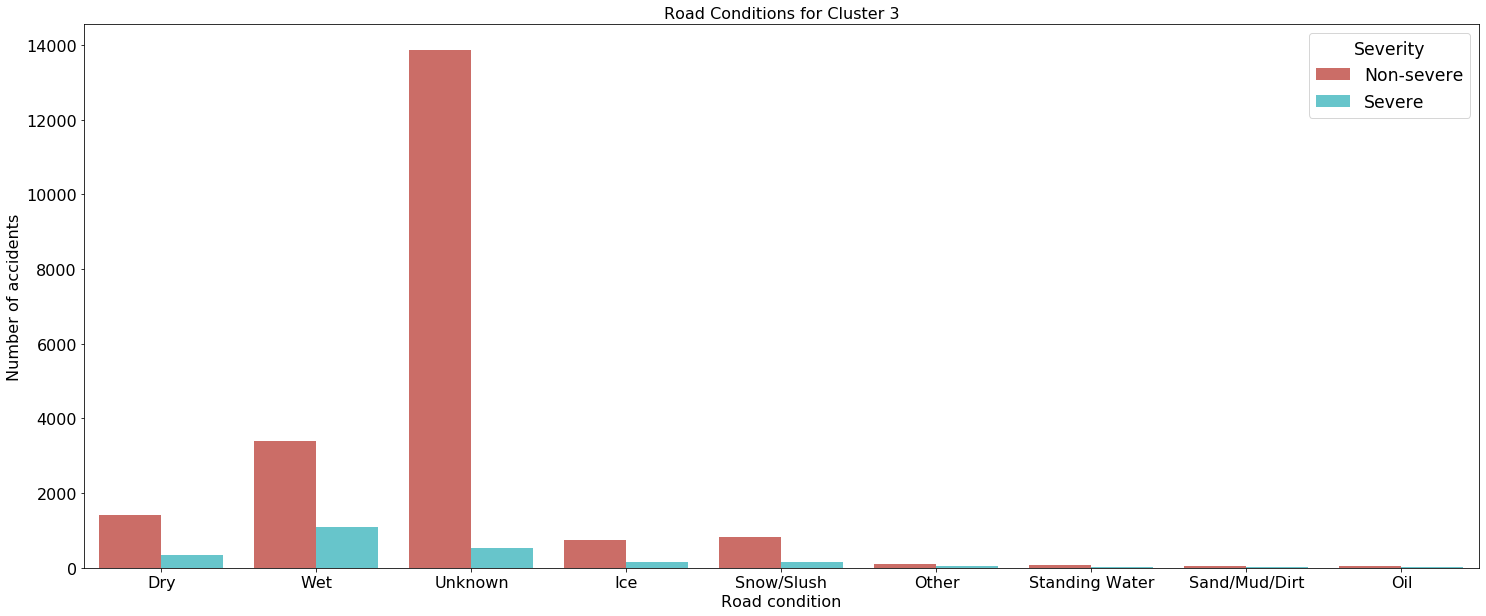

In [80]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="ROADCOND", hue="SEVERITYCODE", data=df_cl2)
ax.set_xticklabels(['Dry','Wet','Unknown', "Ice", 'Snow/Slush', 'Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Road condition', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.title('Road Conditions for Cluster 3', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

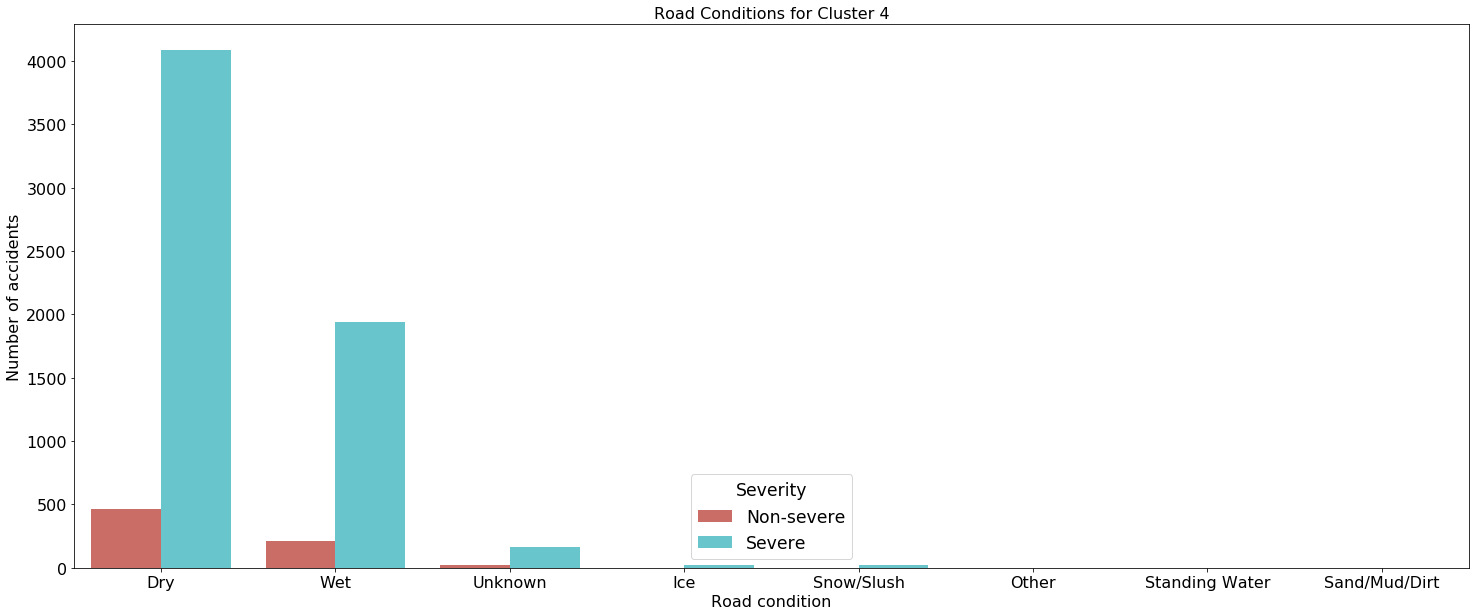

In [81]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="ROADCOND", hue="SEVERITYCODE", data=df_cl3)
ax.set_xticklabels(['Dry','Wet','Unknown', "Ice", 'Snow/Slush', 'Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Road condition', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.title('Road Conditions for Cluster 4', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

Many more plots can be made exploring the relationship between the clusters. For now, we examine Cluster 1 in more detail, since it contains the highest number of severe cases.

In [82]:
df_cl0.describe()

,MONTH,YEAR,HOUR,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE,ADDRTYPE,VEHCOUNT,PEDCOUNT,SEVERITYCODE,labels
count,93449.000000,93449.000000,93449.000000,93449.000000,93449.000000,93449.000000,93449.000000,93449.000000,93449.000000,93449.000000,93449.000000,93449.000000,93449.0
mean,6.507346,2014.736584,12.562574,2.048465,0.461278,0.259211,0.399630,2.293443,0.367527,1.896457,0.000011,1.307237,0.0
std,3.395490,2.869433,6.141236,0.220695,0.734368,0.453941,0.771024,2.152954,0.487849,0.706669,0.003271,0.461351,0.0
min,1.000000,2006.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,4.000000,2012.000000,9.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.0
50%,6.000000,2015.000000,13.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.0
75%,9.000000,2017.000000,17.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,0.000000,2.000000,0.0
max,12.000000,2020.000000,23.000000,3.000000,6.000000,3.000000,7.000000,9.000000,2.000000,12.000000,1.000000,2.000000,0.0


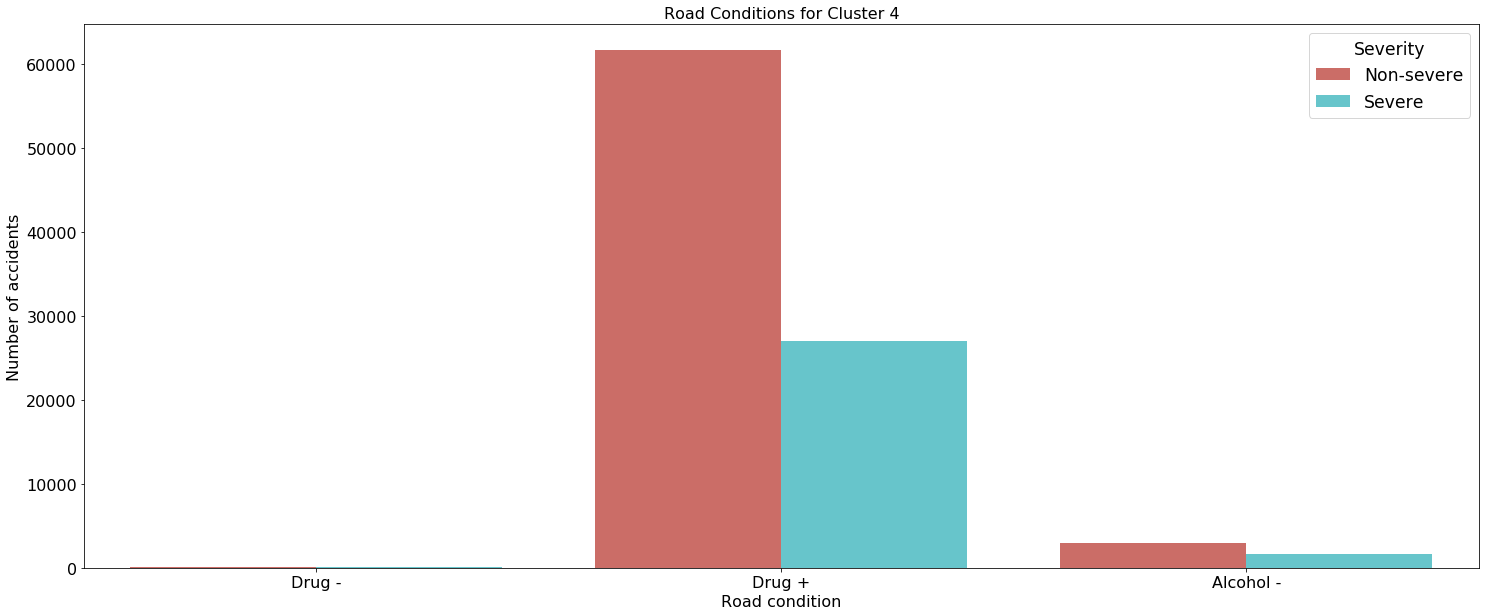

In [83]:
#Intoxication for Cluster 1.
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="UNDERINFL", hue="SEVERITYCODE", data=df_cl0)
ax.set_xticklabels(['Drug -','Drug +','Alcohol -', 'Alcohol +'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Intoxication', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.title('Road Conditions for Cluster 4', fontsize=16)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )

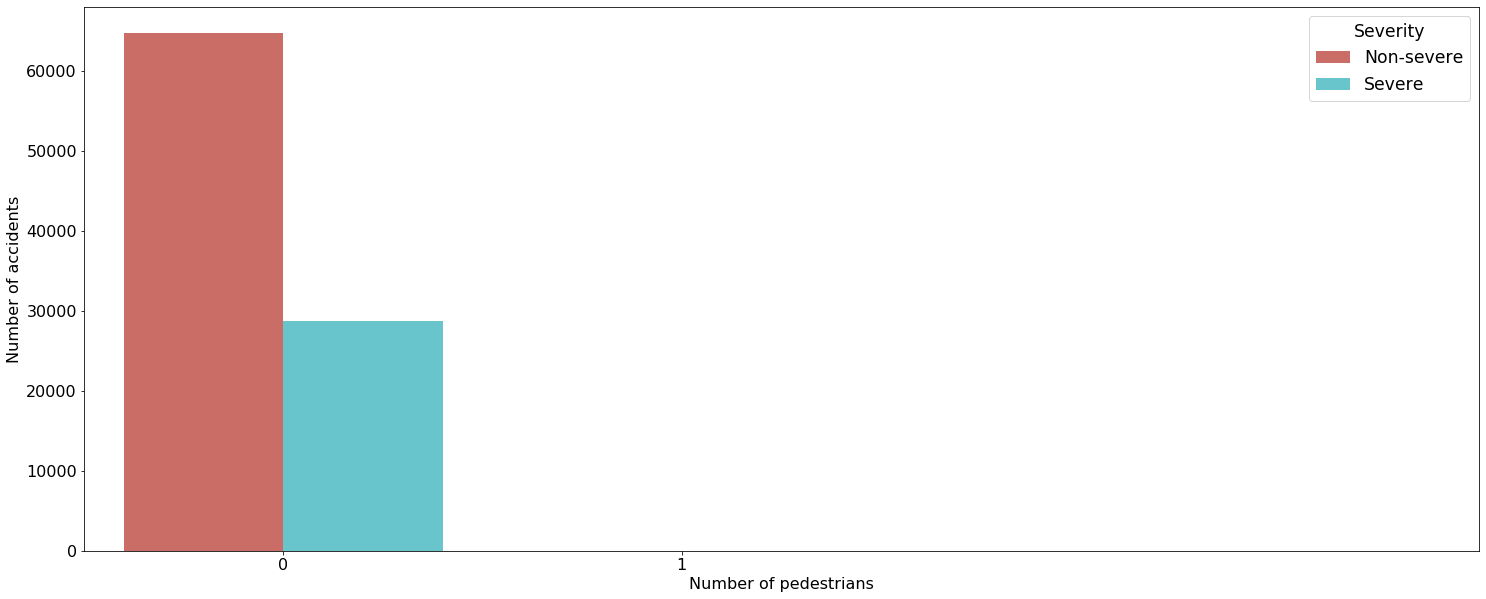

In [84]:
#Histogram of the pedestrian count.
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="PEDCOUNT", hue="SEVERITYCODE", data=df_cl0)
#ax.set_xticklabels(["Block", "Intersection", "Alley"])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Number of pedestrians', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.xlim(-0.5,3)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )
plt.savefig('pedcount.png')



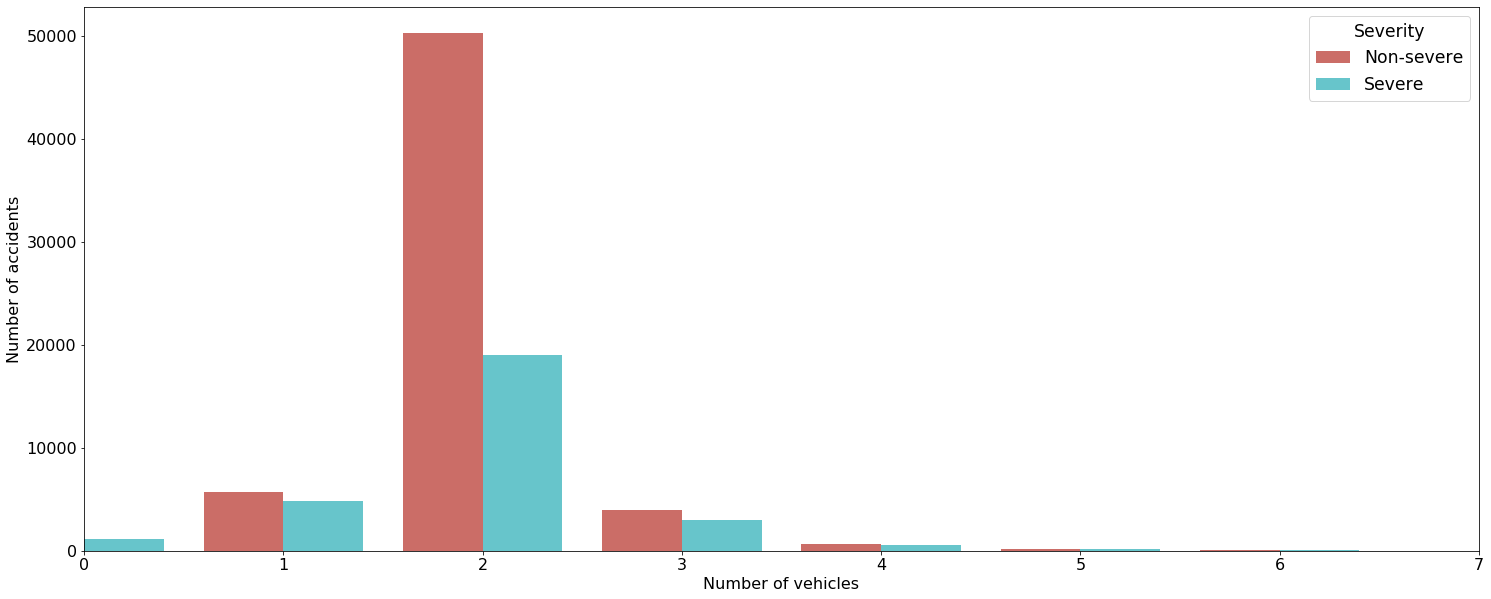

In [85]:
#histograms of the vehicle count.
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax = sns.countplot(x="VEHCOUNT", hue="SEVERITYCODE", data=df_cl0)
#ax.set_xticklabels(["Block", "Intersection", "Alley"])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Number of vehicles', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.xlim(0,7)
plt.legend(["Non-severe", "Severe"], title='Severity',title_fontsize='xx-large', fontsize='xx-large', loc='best' )
plt.savefig('vehcount.png')

Majority of the severe accidents occur with sober people involved. This might be due to the fact that a small minority choose to drive intoxicated due to the regulations. Most of the severe accidents involve a single vehicle and a single pedestrian. These accidents are the deadliest and hence are highly represented in the severe cases cluster.

We will now train a KNN algorithm to be able to predict the future accidents' severity. For this, first split the data set into training and test sets.

In [86]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (175205, 11) (175205,)
Test set: (19468, 11) (19468,)


In [87]:
X_train

array([[ 1.29740951,  1.03747161,  0.68306765, ...,  1.36398593,
         0.12553783, -0.18743029],
       [ 1.0058683 , -1.52828648, -1.57832731, ..., -0.70884124,
         0.12553783, -0.18743029],
       [ 0.42278589,  1.25128478,  0.40039328, ..., -0.70884124,
         0.12553783, -0.18743029],
       ...,
       [-0.74337893,  0.60984526, -0.44762983, ...,  1.36398593,
         1.7102107 , -0.18743029],
       [-0.16029652,  0.39603209,  1.53109076, ..., -0.70884124,
         0.12553783, -0.18743029],
       [-0.74337893,  0.39603209,  1.24841639, ..., -0.70884124,
         0.12553783, -0.18743029]])

In [88]:
y_train = np.array(y_train)

In [89]:
#Run KNN for different k's to find out which gives the maximum accuracy
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67772755, 0.72519006, 0.70351346, 0.73176495, 0.71861516,
       0.7342819 , 0.72498459, 0.7390076 , 0.72806657])

In [90]:
#Looks like it is k=8
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
k =8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat_knn = neigh.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Train set Accuracy:  0.7806398219228903
Test set Accuracy:  0.7390076022190261


Trying out the decision tree.

In [91]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)


In [92]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [93]:
predTree =Tree.predict(X_test)

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))


DecisionTrees's Accuracy:  0.7594514074378467


In [94]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [95]:
a = np.array([str(1), str(2)])

In [96]:
a

array(['1', '2'], dtype='<U1')

In [97]:
#df['SEVERITYCODE'] = data_col['SEVERITYCODE']
#df.head()

In [98]:
y.unique().tolist()

[2, 1]

In [99]:
df.drop('labels', axis=1, inplace=True)

In [100]:
df['SEVERITYCODE'] = data_col['SEVERITYCODE']

In [102]:
#trying logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [103]:
yhat = LR.predict(X_test)

In [104]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.74909339, 0.25090661],
       [0.5878961 , 0.4121039 ],
       [0.87176779, 0.12823221],
       ...,
       [0.74237196, 0.25762804],
       [0.79893179, 0.20106821],
       [0.42934475, 0.57065525]])

In [105]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           1       0.74      0.96      0.84     13714
           2       0.67      0.19      0.29      5754

    accuracy                           0.73     19468
   macro avg       0.71      0.57      0.56     19468
weighted avg       0.72      0.73      0.68     19468



In [106]:
#trying random forest 
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import itertools


#from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier

from imblearn.metrics import geometric_mean_score


def plot_confusion_matrix(cm, classes, ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    print('')

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.sca(ax)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

Decision tree classifier performance:
Balanced accuracy: 0.61 - Geometric mean 0.57
[[11172  2542]
 [ 3435  2319]]



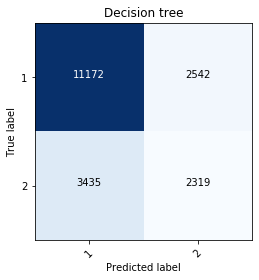

In [108]:


#Classification using a single decision tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('Decision tree classifier performance:')
print('Balanced accuracy: {:.2f} - Geometric mean {:.2f}'
      .format(balanced_accuracy_score(y_test, y_pred_tree),
              geometric_mean_score(y_test, y_pred_tree)))
cm_tree = confusion_matrix(y_test, y_pred_tree)
fig, ax = plt.subplots()
plot_confusion_matrix(cm_tree, classes=a, ax=ax,
                      title='Decision tree')

In [109]:
print(classification_report(y_test.astype(int), y_pred_tree.astype(int)))

              precision    recall  f1-score   support

           1       0.76      0.81      0.79     13714
           2       0.48      0.40      0.44      5754

    accuracy                           0.69     19468
   macro avg       0.62      0.61      0.61     19468
weighted avg       0.68      0.69      0.68     19468



In [110]:
from imblearn.combine import SMOTETomek

In [121]:
#balance the data set 

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_resampled, y_resampled = sm.fit_sample(X, y)

In [122]:
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_resampled, y_resampled, test_size=0.13, random_state=4)
print ('Train set:', X_train_rs.shape,  y_train_rs.shape)
print ('Test set:', X_test_rs.shape,  y_test_rs.shape)

Train set: (237483, 11) (237483,)
Test set: (35487, 11) (35487,)


In [159]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train_rs, np.array(y_train_rs));

Text(0.5, 1, 'Balanced Random Forest')

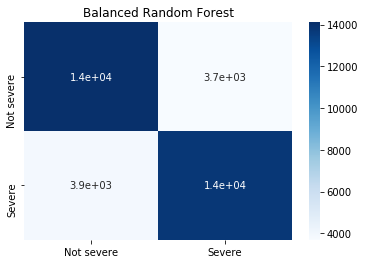

In [160]:
y_pred = rf.predict(X_test_rs)

cm=confusion_matrix(y_test_rs.astype(int), y_pred.astype(int))
sns.heatmap(cm, annot=True,
                    cmap=plt.cm.Blues,
                   xticklabels=['Not severe', 'Severe'],
                   yticklabels=['Not severe', 'Severe']).set_title('Balanced Random Forest')

In [161]:
print(classification_report(y_test_rs.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           1       0.78      0.79      0.79     17797
           2       0.79      0.78      0.78     17690

    accuracy                           0.79     35487
   macro avg       0.79      0.79      0.79     35487
weighted avg       0.79      0.79      0.79     35487



We see improvement in the classification results once the data set is balanced. 

Let's see if more improvement is possible by fine tuning the parameters of the Random Forest Classifier with Grid Search.

In [162]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)
clf.fit(X_train_rs, y_train_rs)

clf.best_params_

{'max_depth': 25, 'n_estimators': 250}

In [163]:
rf = RandomForestClassifier(n_estimators = 250, random_state = 1, max_depth=25)
rf.fit(X_train_rs, np.array(y_train_rs));

Text(0.5, 1, 'Balanced Random Forest')

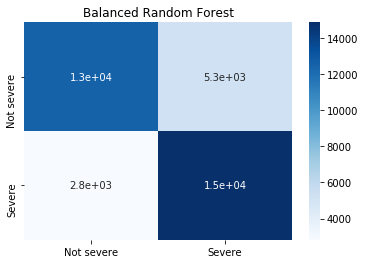

In [165]:
y_pred = rf.predict(X_test_rs)

cm=confusion_matrix(y_test_rs.astype(int), y_pred.astype(int))
sns.heatmap(cm, annot=True,
                    cmap=plt.cm.Blues,
                   xticklabels=['Not severe', 'Severe'],
                   yticklabels=['Not severe', 'Severe']).set_title('Balanced Random Forest')

In [166]:
print(classification_report(y_test_rs.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           1       0.82      0.70      0.76     17797
           2       0.74      0.84      0.79     17690

    accuracy                           0.77     35487
   macro avg       0.78      0.77      0.77     35487
weighted avg       0.78      0.77      0.77     35487



There is no major change in the metrics and it looks like we have a decently well trained model.

To sum up, in this notebook we have trained a Balanced Random Forest model to predict the severity of car accidents in the city of Seattle.

In [167]:
pwd

'/Users/monad/Documents/ML_NBs'